# Exploratory Data Analysis

In [222]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [223]:
df = pd.read_csv('Data/term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [224]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


Features look to have no missing values. Below I will change the 'object' types to 'category' for memory purposes

In [226]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  category
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  category
 7   loan       40000 non-null  category
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.9 MB


## Categorical Variables

In [227]:
for col in df.columns:
    if df[col].dtype == 'category':
        print(col)
        print(df[col].unique())
        print('*'*40)


job
['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
****************************************
marital
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']
****************************************
education
['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']
****************************************
default
['no', 'yes']
Categories (2, object): ['no', 'yes']
****************************************
housing
['yes', 'no']
Categories (2, object): ['no', 'yes']
****************************************
loan
['no', 'yes']
Categories (2, object): ['no', 'yes']
****************************************
contact
['unknown', 'cellular', 'telephone']
Categories

In [228]:
for col in df.columns:
    if col=='default' or col=='housing' or col=='loan' or col=='y':
        df.replace({col: {'yes': '1', 'no': '0'}}, inplace=True)
        df[col] = df[col].astype('int32')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  int32   
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  int32   
 7   loan       40000 non-null  int32   
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  int32   
dtypes: category(5), int32(4), int64(5)
memory usage: 2.3 MB


In [230]:
        
cat_list = [col for col in df.columns if df[col].dtype == 'category']
print(f"Categorical variables: {cat_list}")
num_list = [col for col in df.columns if df[col].dtype != 'category']
print(f"Numerical variables: {num_list}")

Categorical variables: ['job', 'marital', 'education', 'contact', 'month']
Numerical variables: ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'y']


In [231]:
######## HELPER Function that makes countplot of categorical features

def make_count_plot(df, feature_to_count=str, hue=None):
    sns.countplot(data=df, x=feature_to_count, hue=hue)
    plt.xlabel(f"{feature_to_count.title()} counts")
    plt.xticks(rotation=45)
    plt.show()

### Job

In [232]:
df['job'].value_counts(normalize=True)

job
blue-collar     0.23
management      0.20
technician      0.17
admin           0.11
services        0.10
retired         0.04
self-employed   0.04
entrepreneur    0.04
unemployed      0.03
housemaid       0.03
student         0.01
unknown         0.01
Name: proportion, dtype: float64

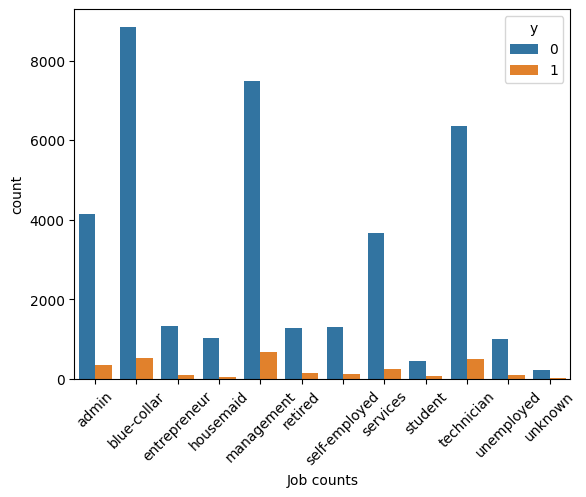

In [233]:
make_count_plot(df, 'job', hue='y')

### Marital

In [234]:
df['marital'].value_counts(normalize=True)

marital
married    0.61
single     0.27
divorced   0.12
Name: proportion, dtype: float64

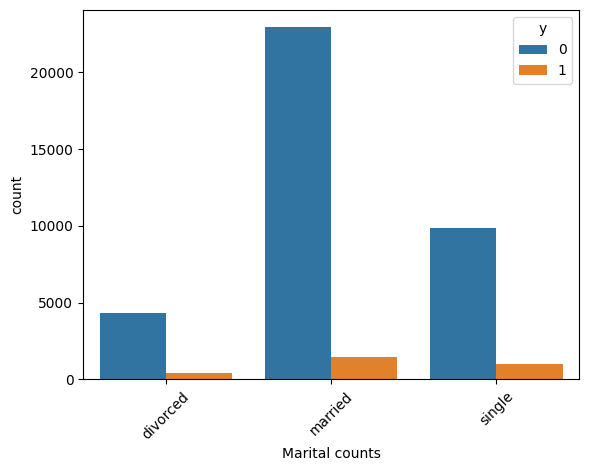

In [235]:
make_count_plot(df, 'marital', 'y')

### Education

In [236]:
df['education'].value_counts(normalize=True)

education
secondary   0.52
tertiary    0.28
primary     0.16
unknown     0.04
Name: proportion, dtype: float64

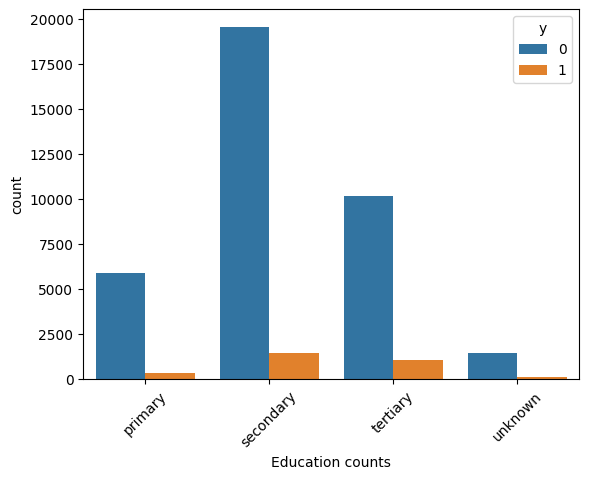

In [237]:
make_count_plot(df, 'education', 'y')

### Contact

In [238]:
df['contact'].value_counts(normalize=True)

contact
cellular    0.62
unknown     0.32
telephone   0.06
Name: proportion, dtype: float64

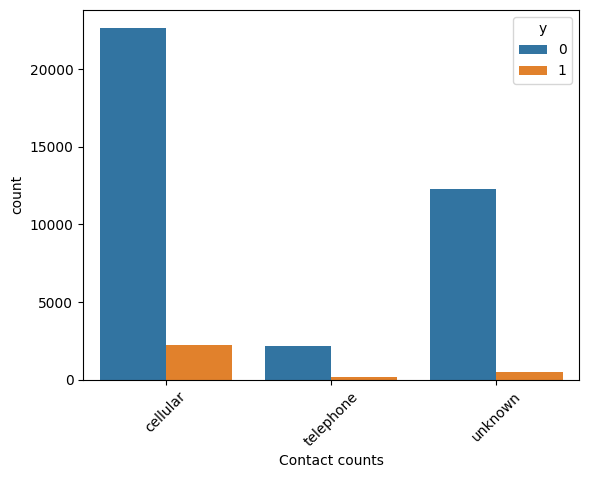

In [239]:
make_count_plot(df, 'contact', 'y')

### Month

In [240]:
df['month'].value_counts(normalize=True)

month
may   0.34
jul   0.16
aug   0.13
jun   0.12
nov   0.09
apr   0.07
feb   0.06
jan   0.03
mar   0.01
oct   0.00
dec   0.00
Name: proportion, dtype: float64

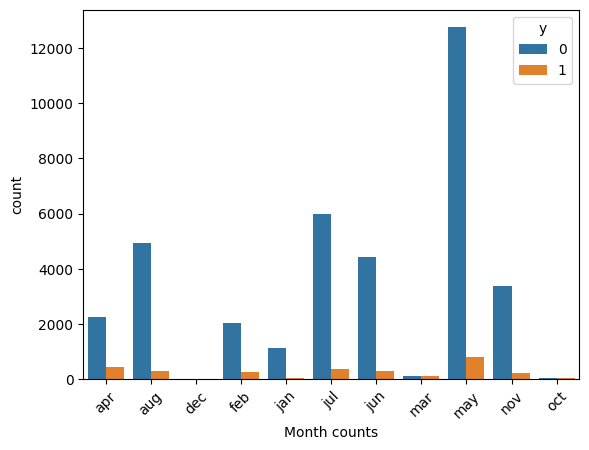

In [241]:
make_count_plot(df, 'month', 'y')

## Numerical Variables

In [242]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,y
count,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00,40000.00
mean,40.54,0.02,1274.28,0.60,0.17,16.02,254.82,2.88,0.07
std,9.64,0.14,2903.77,0.49,0.38,8.28,259.37,3.24,0.26
min,19.00,0.00,-8019.00,0.00,0.00,1.00,0.00,1.00,0.00
25%,33.00,0.00,54.00,0.00,0.00,8.00,100.00,1.00,0.00
50%,39.00,0.00,407.00,1.00,0.00,17.00,175.00,2.00,0.00
75%,48.00,0.00,1319.00,1.00,0.00,21.00,313.00,3.00,0.00
max,95.00,1.00,102127.00,1.00,1.00,31.00,4918.00,63.00,1.00


In [243]:
df['duration_in_minutes'] = df['duration'] / 60
df['duration_in_minutes']

num_list.remove('duration')
num_list.append('duration_in_minutes')

### y (target feature)

In [244]:
df['y'].value_counts(normalize=True)

y
0   0.93
1   0.07
Name: proportion, dtype: float64

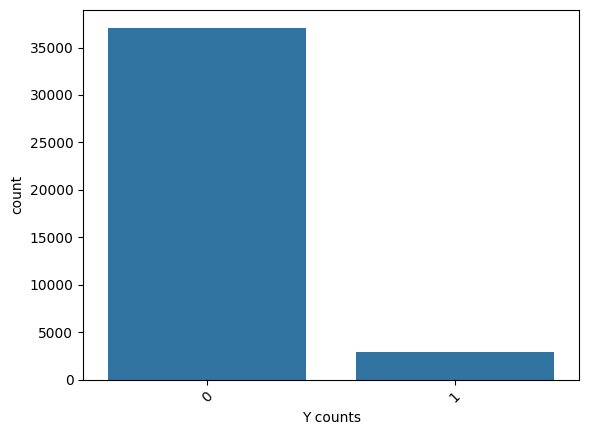

In [245]:
make_count_plot(df, 'y')

We can see that the target feature that we are trying to predict is heavily skewed towards the positive class or the class of people that subscribed to a term deposit product.

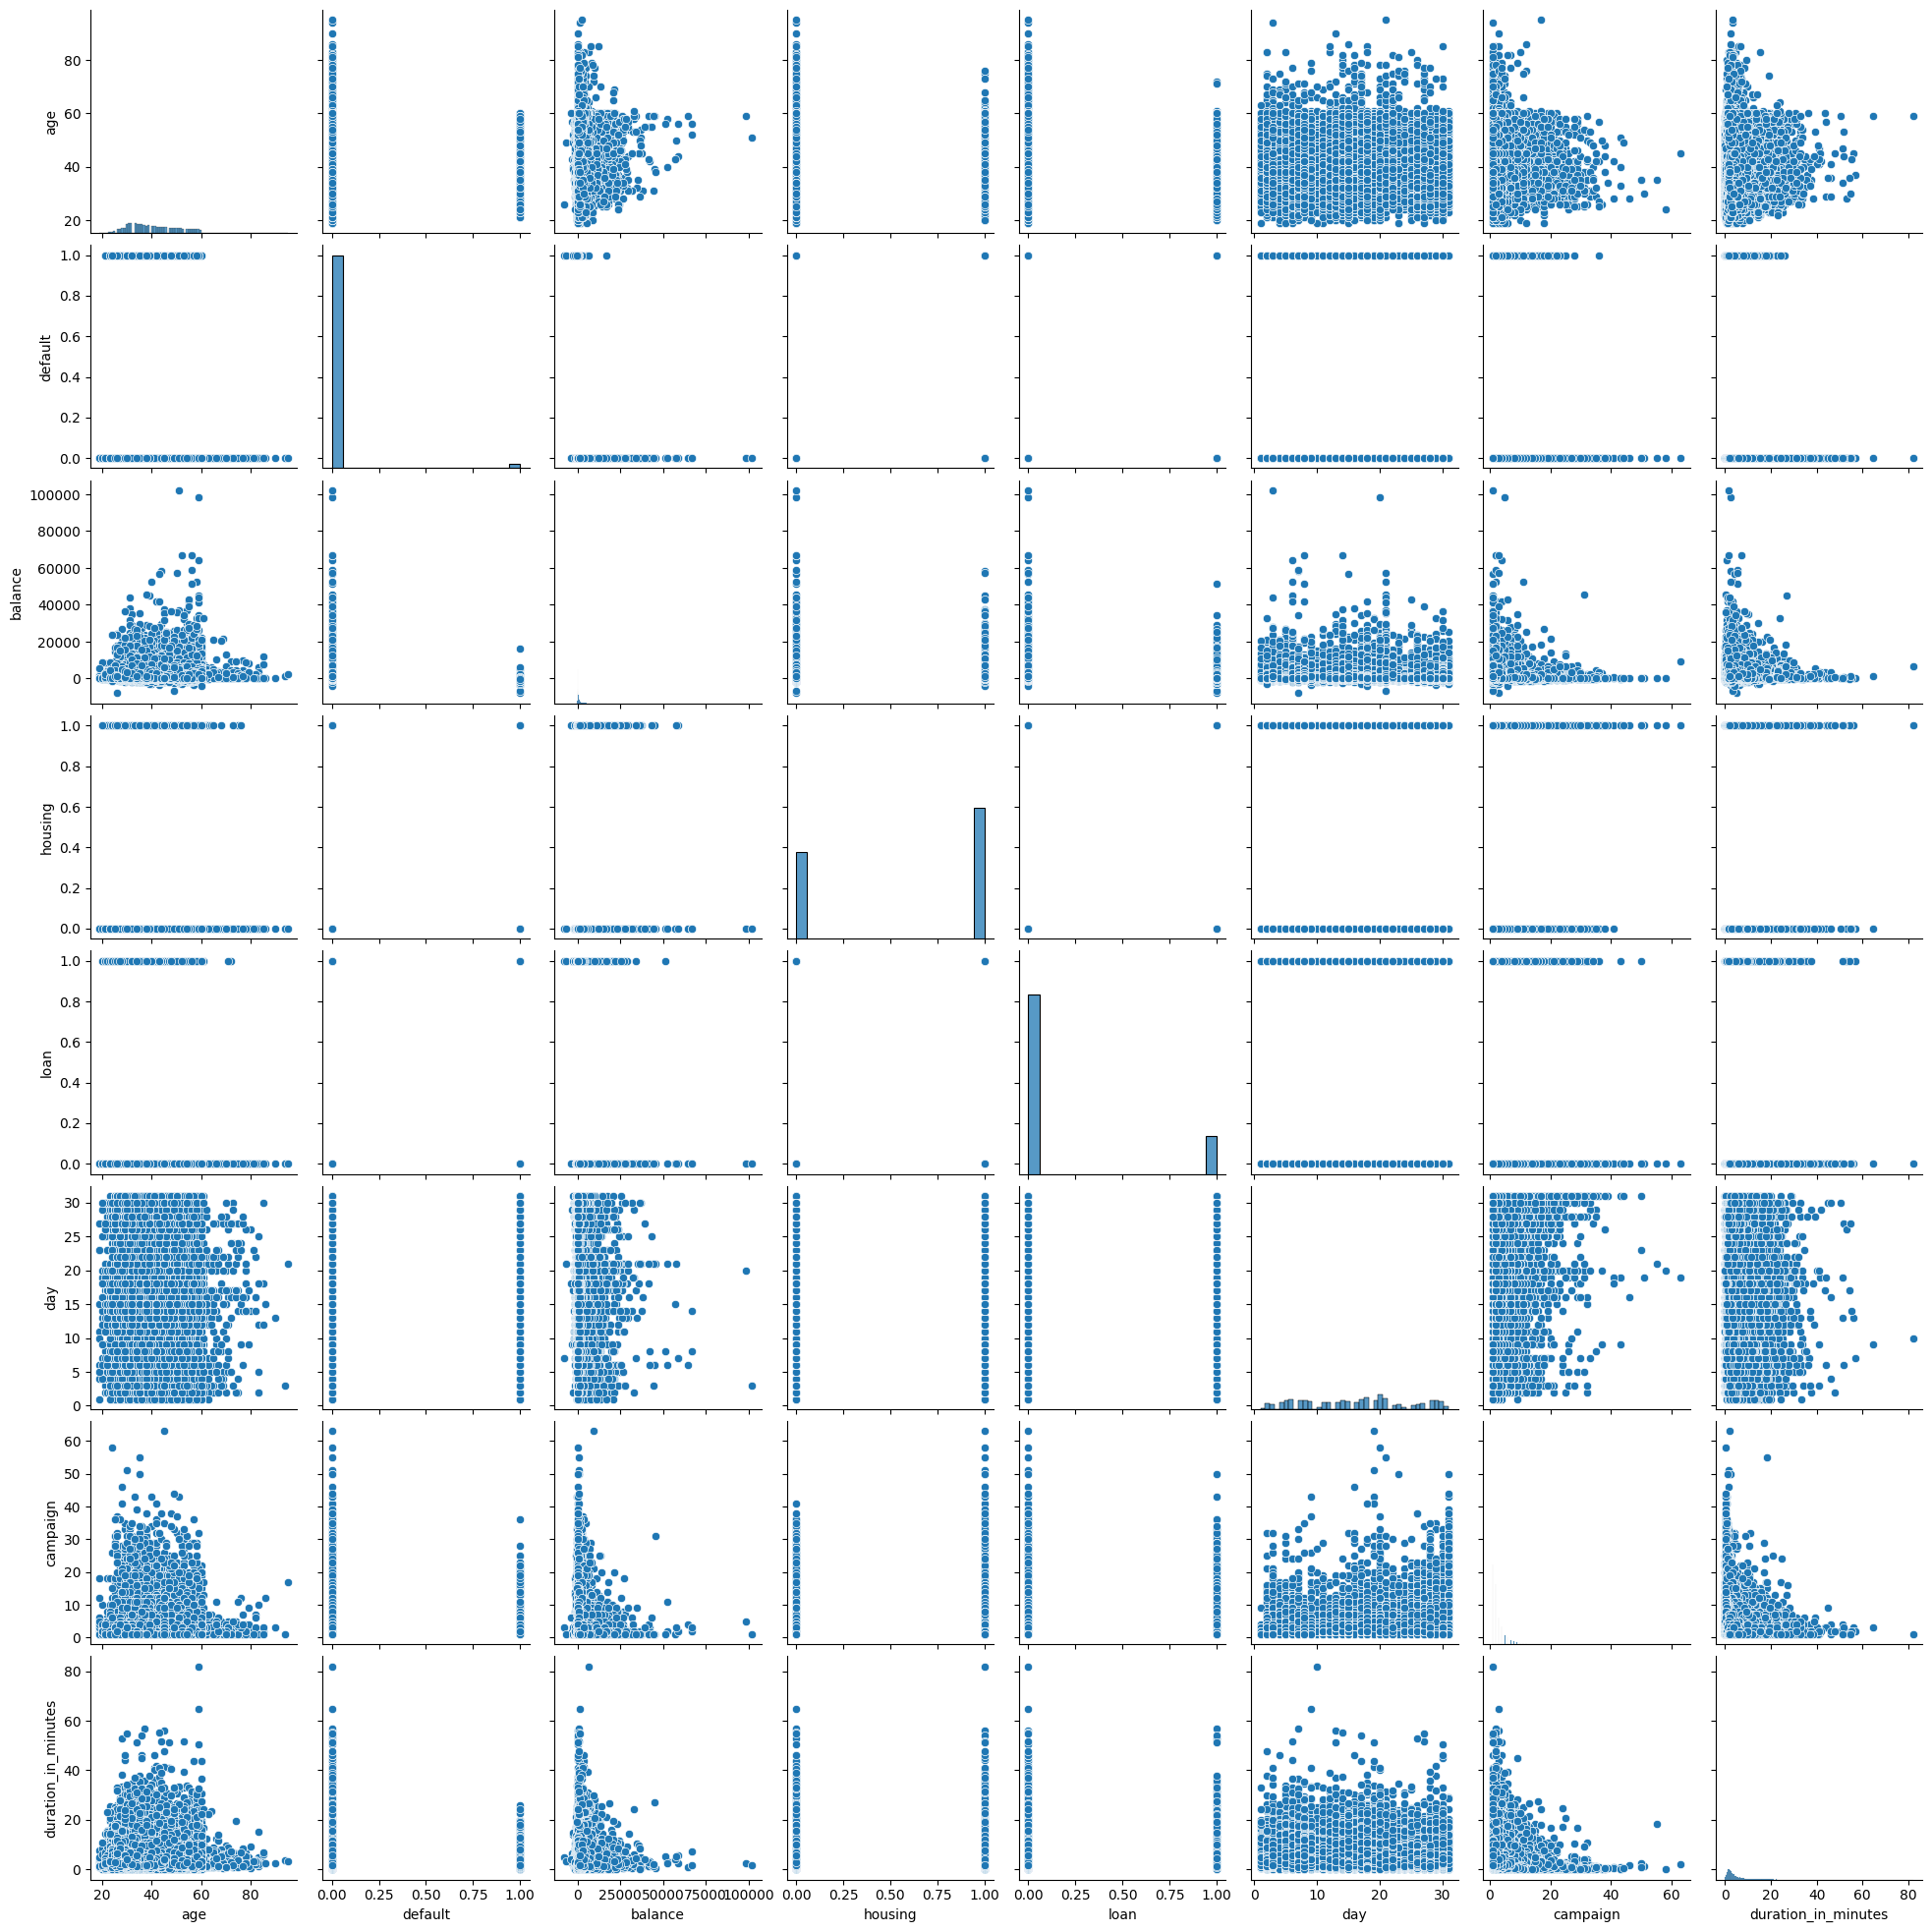

In [246]:
sns.pairplot(data=df[num_list].drop(columns='y', axis=1))
plt.show()

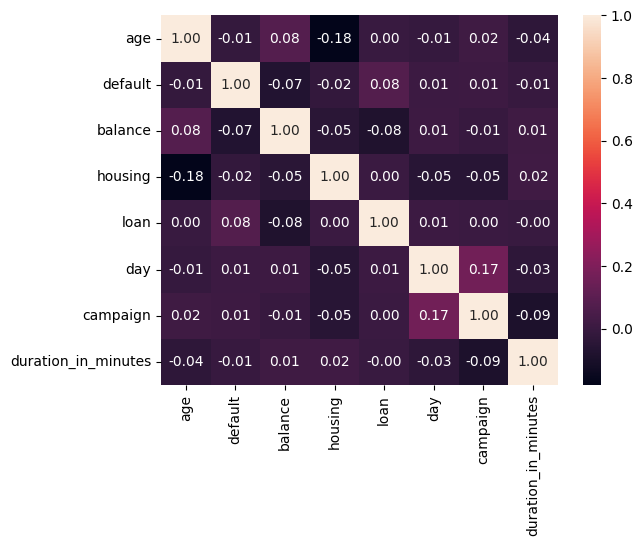

In [247]:
sns.heatmap(data=df[num_list].drop(columns='y', axis=1).corr(), annot=True, fmt='.2f')
plt.show()

From the two graphs above we can see that there are little to no linear correlations between features. The pairplot does show a few exponential correlations between duration_in_minutes and balance, campaign and balance, and campaign and duration_in_minutes.